# 1 - Perkenalan

Nama : Ulul Azmi
Batch : FTDS 015 Remote
Dataset : Intel Image Classification from [Kaggle.com](https://www.kaggle.com/datasets/blastchar/telco-customer-churn).
Objective : Want to build powerful Neural network that can classify these image.

# 2 - Import Pustaka

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense, Dropout, Flatten

from sklearn.metrics import confusion_matrix, classification_report
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

# 3 - Data Loading

In [2]:
## Install Kaggle library
!pip install kaggle

## Make a directory named `.kaggle`
!mkdir ~/.kaggle

## Copy the kaggle.json into this new directory 
!cp kaggle.json ~/.kaggle/

## Change permission for this directory : 
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Download Dataset
!kaggle datasets download -d puneet6060/intel-image-classification

 91% 314M/346M [00:01<00:00, 342MB/s]
100% 346M/346M [00:01<00:00, 323MB/s]


In [4]:
# Unzip Dataset
!unzip ./intel-image-classification.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain

In [5]:
os.listdir('/content/seg_train')

['seg_train']

In [6]:
os.listdir('/content/seg_test')

['seg_test']

In [7]:
os.listdir('/content/seg_pred')

['seg_pred']

In [103]:
# Create Path
train_path = '/content/seg_train'
test_path = '/content/seg_test'

In [9]:
train_dir = os.path.join(train_path, 'seg_train')
test_dir = os.path.join(test_path, 'seg_test')

In [10]:
print('train set: \n' + '='*50)
num_buildings= len(os.listdir(os.path.join(train_dir, 'buildings')))
num_forest= len(os.listdir(os.path.join(train_dir, 'forest')))
num_glacier= len(os.listdir(os.path.join(train_dir, 'glacier')))
num_mountain= len(os.listdir(os.path.join(train_dir, 'mountain')))
num_sea= len(os.listdir(os.path.join(train_dir, 'sea')))
num_street= len(os.listdir(os.path.join(train_dir, 'street')))


print(f'jumlah buildings= {num_buildings}')
print(f'jumlah forest= {num_forest}')
print(f'jumlah glacier= {num_glacier}')
print(f'jumlah mountain= {num_mountain}')
print(f'jumlah sea= {num_sea}')
print(f'jumlah street= {num_street}')

train set: 
jumlah buildings= 2191
jumlah forest= 2271
jumlah glacier= 2404
jumlah mountain= 2512
jumlah sea= 2274
jumlah street= 2382


In [11]:
print('test set: \n' + '='*50)
num_buildings= len(os.listdir(os.path.join(test_dir, 'buildings')))
num_forest= len(os.listdir(os.path.join(test_dir, 'forest')))
num_glacier= len(os.listdir(os.path.join(test_dir, 'glacier')))
num_mountain= len(os.listdir(os.path.join(test_dir, 'mountain')))
num_sea= len(os.listdir(os.path.join(test_dir, 'sea')))
num_street= len(os.listdir(os.path.join(test_dir, 'street')))


print(f'jumlah buildings= {num_buildings}')
print(f'jumlah forest= {num_forest}')
print(f'jumlah glacier= {num_glacier}')
print(f'jumlah mountain= {num_mountain}')
print(f'jumlah sea= {num_sea}')
print(f'jumlah street= {num_street}')

test set: 
jumlah buildings= 437
jumlah forest= 474
jumlah glacier= 553
jumlah mountain= 525
jumlah sea= 510
jumlah street= 501


In [12]:
train_buildings = glob.glob(train_dir+"/buildings/*.jpg")
train_forest = glob.glob(train_dir+"/forest/*.jpg")
train_glacier = glob.glob(train_dir+"/glacier/*.jpg")
train_mountain = glob.glob(train_dir+"/mountain/*.jpg")
train_sea = glob.glob(train_dir+"/sea/*.jpg")
train_street = glob.glob(train_dir+"/street/*.jpg")

test_buildings = glob.glob(test_dir+"/buildings/*.jpg")
test_forest = glob.glob(test_dir+"/forest/*.jpg")
test_glacier = glob.glob(test_dir+"/glacier/*.jpg")
test_mountain = glob.glob(test_dir+"/mountain/*.jpg")
test_sea = glob.glob(test_dir+"/sea/*.jpg")
test_street = glob.glob(test_dir+"/street/*.jpg")

# 4 -  Exploratory Data Analisis

/content/seg_train/seg_train/buildings/0.jpg

In [95]:
def create_dataframe(list_of_images):
    data = []
    for image in list_of_images:
        ##ambil nama dari file \ ke -1
        # images.append(image.split('\')[-1]) 
        # label.append(image.split('\')[-2])
        data.append((image, image.split('/')[-2]))
    return pd.DataFrame(data, columns=['images', 'label'])

train_df = create_dataframe(train_buildings + train_forest + train_glacier + train_mountain + train_sea + train_street)
train_df = train_df.sample(frac=1, random_state=1).reset_index(drop=True)

test_df = create_dataframe(test_buildings + test_forest + test_glacier + test_mountain + test_sea + test_street)
test_df = test_df.sample(frac=1, random_state=1).reset_index(drop=True)

In [14]:
print(train_df.shape)
train_df.head()

(14034, 2)


,images,label
0,/content/seg_train/seg_train/mountain/5124.jpg,mountain
1,/content/seg_train/seg_train/glacier/13420.jpg,glacier
2,/content/seg_train/seg_train/glacier/18366.jpg,glacier
3,/content/seg_train/seg_train/mountain/4941.jpg,mountain
4,/content/seg_train/seg_train/sea/15020.jpg,sea


In [15]:
print(test_df.shape)
test_df.head()

(3000, 2)


,images,label
0,/content/seg_test/seg_test/mountain/24032.jpg,mountain
1,/content/seg_test/seg_test/sea/24163.jpg,sea
2,/content/seg_test/seg_test/glacier/21288.jpg,glacier
3,/content/seg_test/seg_test/mountain/23609.jpg,mountain
4,/content/seg_test/seg_test/glacier/20770.jpg,glacier


In [16]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=1, stratify = train_df['label'])
print(train_df.shape)
print(val_df.shape)

(11227, 2)
(2807, 2)


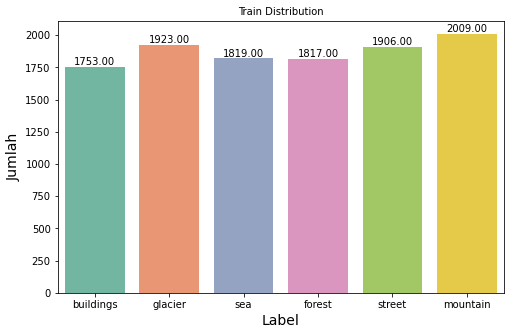

In [17]:
def visualize_data(dataframe, label):
    fig, ax = plt.subplots(figsize =(8, 5))
    ax = sns.countplot(x='label', data=dataframe, palette='Set2')
    ax.set_title('Data Distribution')
    ax.set_xlabel('Label')
    ax.set_ylabel('Count')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2,
                    p.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
    
    # Setting the label for x-axis
    plt.xlabel("Label", size=14)
    # Setting the label for y-axis
    plt.ylabel("Jumlah", size=14)
    # plt title base on name of 
    plt.title(f"{label} Distribution", size=10)
    plt.show()

visualize_data(train_df, 'Train')

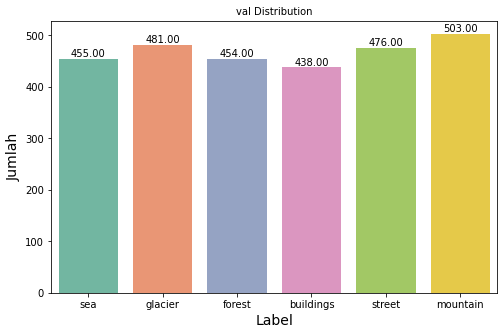

In [18]:
visualize_data(val_df, 'val')

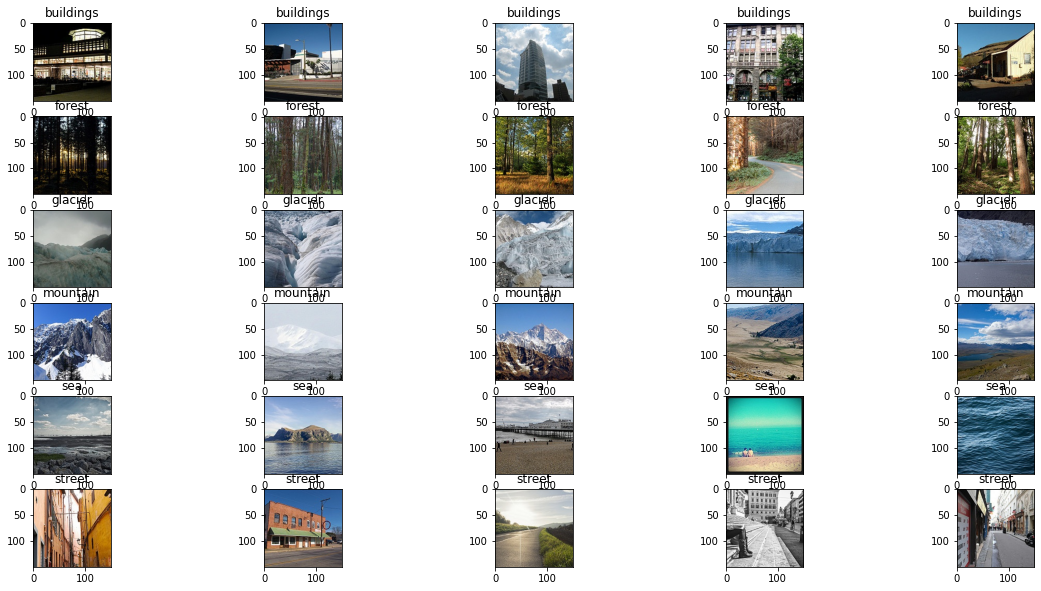

In [19]:
# Get few samples for both the classes
buildings_samples = (train_df[train_df['label']=="buildings"]['images'].iloc[:5]).tolist()
forest_samples = (train_df[train_df['label']=='forest']['images'].iloc[:5]).tolist()
glacier_samples = (train_df[train_df['label']=='glacier']['images'].iloc[:5]).tolist()
mountain_samples = (train_df[train_df['label']=='mountain']['images'].iloc[:5]).tolist()
sea_samples = (train_df[train_df['label']=='sea']['images'].iloc[:5]).tolist()
street_samples = (train_df[train_df['label']=='street']['images'].iloc[:5]).tolist()

# visualize sample images
def visualize_samples(samples):
    fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(20,10))
    for i, sample in enumerate(samples):
        img = cv2.imread(sample)
        ax[i//5, i%5].set_title(sample.split('/')[-2])
        ax[i//5, i%5].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

visualize_samples(buildings_samples + forest_samples + glacier_samples + mountain_samples + sea_samples + street_samples)

Pada data train dan test, terdapat 5 label yaitu 'buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'.
dapat dilihat jika jumlah gambar hampir sama banyak.

# 5 - Preprocessing

## Augmentasi Data

In [20]:
img_height= 150
img_width= 150
SEED = 1
BATCH =32

In [21]:
# create image generator
train_datagen = ImageDataGenerator(
    rescale=1./255, #normalisasi pixel
    rotation_range=0.1,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

vaL_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
ds_train = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='images',
    y_col='label',
    target_size=(img_height, img_width), #ini buat nentuin target biar sama sizenya
    class_mode='categorical',
    batch_size=BATCH,
    shuffle=True,
    seed=SEED)

ds_val = vaL_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='images',
    y_col='label',
    target_size=(img_height, img_width),
    class_mode='categorical',
    batch_size=BATCH,
    shuffle=False,
    seed=SEED)

df_test = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='images',
    y_col='label',
    target_size=(img_height, img_width),
    class_mode='categorical',
    batch_size=BATCH,
    shuffle=False,
    seed=SEED)

Found 11227 validated image filenames belonging to 6 classes.
Found 2807 validated image filenames belonging to 6 classes.
Found 3000 validated image filenames belonging to 6 classes.


Membuat dataframe dan menyesuaikan validasi sebesar 20% dari data train, dan mendefinisikan dari data generator , sekarang data sudah siap dipakai.

In [23]:
class_train = ds_train.class_indices
print(class_train)

{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


# 6 - Model

## Model Definition

In [24]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 128 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(6, activation='softmax')  
])

saya menggunakan `32 filters dan 2 feature dan 3 kernel`, dengan `output layer 6 neuron`.
aktivasi relu dimana untuk menyalakan neuron ,untuk aktifasi saya memilih Softmax karena data multiclass.

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

Terlihat total params untuk baseline model 19/100.102, dengan 3 filter , 3 pooling, dan 3 hidden layer`

In [26]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

- Untuk loss saya memakai categorical_crossentropy, karena ini adalah fungsi loss default yang digunakan untuk masalah klasifikasi multiclasss.

- untuk baseline saya mencoba memakai optimizer Adam
- untuk metrics memakai accuracy, dikarenakan saya membuat model untuk kasus classification.

## Model Training

In [27]:
# fit the model
# early stopping: we can use EarlyStopping which is one of keras callbackes to stop training when a monitored metric has stopped improving.
earlystop = EarlyStopping(monitor='loss', patience=5)
epoch = 20 # we can set it to a large value because there is early stopping

history = model.fit(ds_train, 
                                 epochs = epoch, 
                                 validation_data = ds_val, 
                                 verbose = 1,
                                 steps_per_epoch = 110)
                                 #callbacks = [earlystop]) # steps_per_epoch  = total number of samples // batch_size = 14034/128

Epoch 1/20
110/110 [==============================] - 32s 199ms/step - loss: 1.3521 - accuracy: 0.4523 - val_loss: 1.0051 - val_accuracy: 0.5892
Epoch 2/20
110/110 [==============================] - 22s 197ms/step - loss: 1.0787 - accuracy: 0.5679 - val_loss: 0.9652 - val_accuracy: 0.6053
Epoch 3/20
110/110 [==============================] - 22s 196ms/step - loss: 0.9862 - accuracy: 0.6051 - val_loss: 1.0019 - val_accuracy: 0.6149
Epoch 4/20
110/110 [==============================] - 22s 196ms/step - loss: 0.9529 - accuracy: 0.6219 - val_loss: 0.8359 - val_accuracy: 0.6904
Epoch 5/20
110/110 [==============================] - 22s 197ms/step - loss: 0.8688 - accuracy: 0.6534 - val_loss: 0.7725 - val_accuracy: 0.7075
Epoch 6/20
110/110 [==============================] - 22s 196ms/step - loss: 0.8205 - accuracy: 0.6852 - val_loss: 0.7802 - val_accuracy: 0.7029
Epoch 7/20
110/110 [==============================] - 22s 197ms/step - loss: 0.7917 - accuracy: 0.7048 - val_loss: 0.7170 - val_ac

untuk baseline model, saya melakukan epoch 10, dimana `epoch` adalah ketika seluruh dataset sudah melalui proses training pada Neural Netwok sampai dikembalikan ke awal untuk sekali putaran

In [28]:
## Save the model
model.save('Basic_CNN.h5')
model = tf.keras.models.load_model('Basic_CNN.h5')

## Model Evaluation

In [29]:
# Create Dataframe

history_seq_df = pd.DataFrame(history.history)

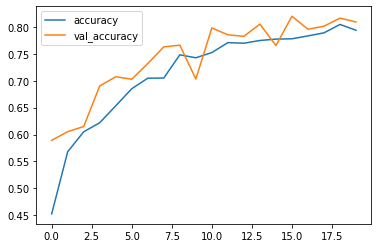

In [30]:
# Plot between Accuracy and val_accuracy

history_seq_df[['accuracy', 'val_accuracy']].plot()

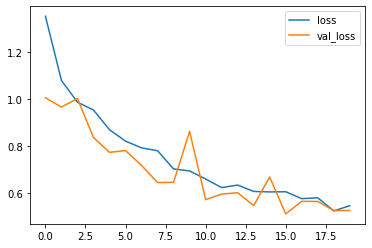

In [31]:
# Plot between loss and val_loss

history_seq_df[['loss', 'val_loss']].plot()

94/94 [==============================] - 3s 33ms/step - loss: 0.5017 - accuracy: 0.8207
Confusion Matrix
[[265   5   1  13  23 130]
 [  1 459   0   7   2   5]
 [  0   4 375 113  56   5]
 [  0   1  37 436  50   1]
 [  3   3  10  31 459   4]
 [ 10   7   3   4   9 468]]
Classification Report
              precision    recall  f1-score   support

   buildings       0.95      0.61      0.74       437
      forest       0.96      0.97      0.96       474
     glacier       0.88      0.68      0.77       553
    mountain       0.72      0.83      0.77       525
         sea       0.77      0.90      0.83       510
      street       0.76      0.93      0.84       501

    accuracy                           0.82      3000
   macro avg       0.84      0.82      0.82      3000
weighted avg       0.84      0.82      0.82      3000



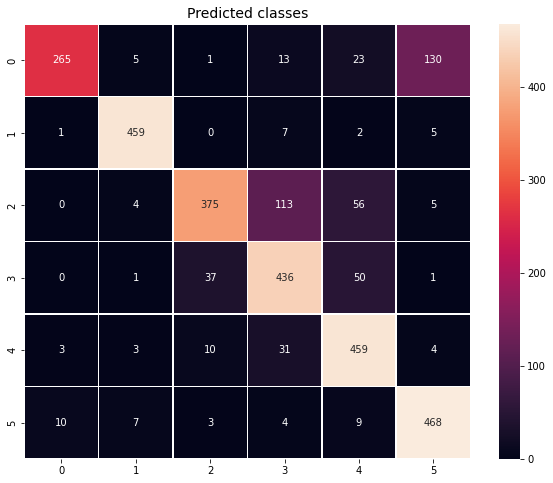

In [32]:
#Confution Matrix and Classification Report
Y_pred = model.predict(df_test)
model.evaluate(df_test)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(df_test.classes, y_pred))
print('Classification Report')
target_names = ['buildings','forest','glacier','mountain','sea','street']
print(classification_report(df_test.classes, y_pred, target_names=target_names))
plt.figure(figsize=(10,8))
plt.title('Predicted classes', size=14)
sns.heatmap(confusion_matrix(df_test.classes, y_pred), annot=True, fmt = '.0f',linewidths=.5)
plt.show()

In [33]:
## Save the model
model.save('Basic_CNN.h5')
model = tf.keras.models.load_model('Basic_CNN.h5')

In [34]:
# freeze model
model.trainable = False

Model ini cukup bagus. memiliki akurasi 83%
precission disini adalah berhasilnya menebak dari data support sebanyak hasil, jika dilihat dari `class 0` angka 0.91 artinya sebanyak 91% berhasil menebak dan 9% menebak salah,
dan recall disini sebesar 64% yang artinnya berhasil menebak 64% dan sisa 36% itu adalah data selain class tersebut, begitu pula di kelas 1-6.

## Model Improvement

pada model improvement saya akan menambahkan layesrs batch normalization dengan harapan setelah di normalisasi dapat meningkatkan akurasi

untuk optimizer, loss, dan metrics masih menggunakan fitur yang sama.

In [35]:
model_imp = tf.keras.models.Sequential()

model_imp.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu'))
model_imp.add(tf.keras.layers.BatchNormalization())
model_imp.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model_imp.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_imp.add(tf.keras.layers.BatchNormalization())
model_imp.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model_imp.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model_imp.add(tf.keras.layers.BatchNormalization())
model_imp.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model_imp.add(tf.keras.layers.Flatten())
model_imp.add(tf.keras.layers.Dense(512, activation='relu'))
model_imp.add(tf.keras.layers.Dense(128, activation='relu'))
model_imp.add(tf.keras.layers.Dropout(0.2))

model_imp.add(tf.keras.layers.Dense(6, activation='softmax'))

model_imp.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [36]:
model_imp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 64)       256       
 hNormalization)                                                 
                                                      

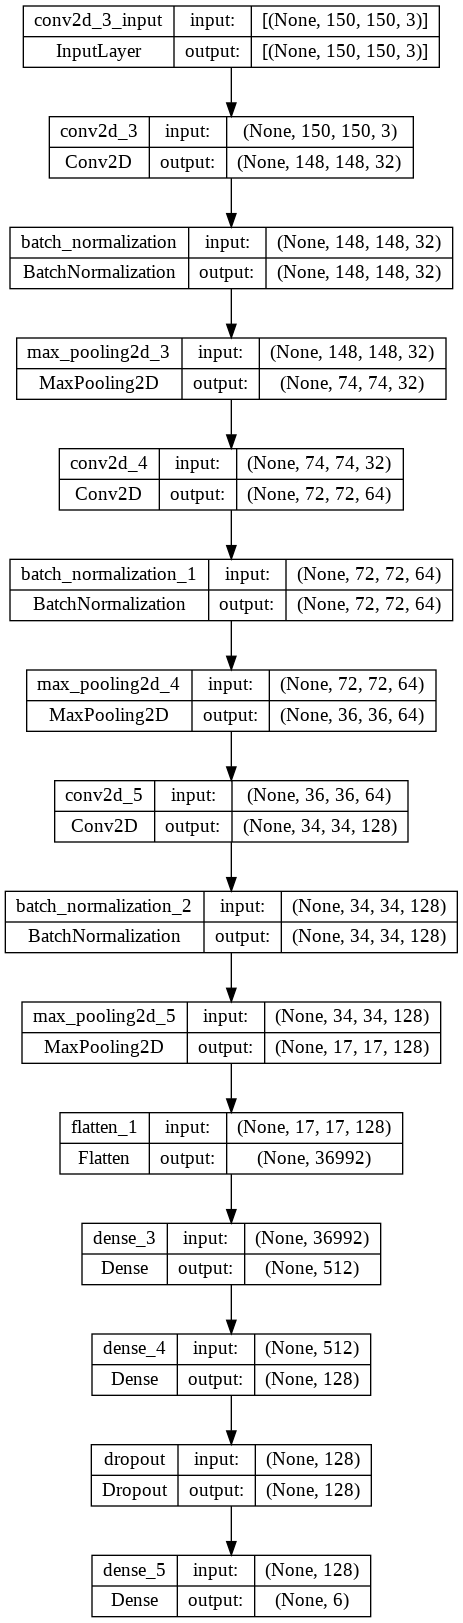

In [37]:
#show plot sumarry
tf.keras.utils.plot_model(model_imp, show_shapes=True)

## Model Improvement Training

In [38]:
history_imp = model_imp.fit(ds_train, 
                                 epochs = epoch, 
                                 validation_data = ds_val, 
                                 verbose = 1,
                                 steps_per_epoch = 110)

Epoch 1/20
110/110 [==============================] - 23s 201ms/step - loss: 4.2316 - accuracy: 0.4097 - val_loss: 3.5813 - val_accuracy: 0.2123
Epoch 2/20
110/110 [==============================] - 22s 197ms/step - loss: 1.3157 - accuracy: 0.4759 - val_loss: 1.9742 - val_accuracy: 0.2401
Epoch 3/20
110/110 [==============================] - 22s 197ms/step - loss: 1.2464 - accuracy: 0.5051 - val_loss: 1.6039 - val_accuracy: 0.3473
Epoch 4/20
110/110 [==============================] - 22s 197ms/step - loss: 1.1114 - accuracy: 0.5699 - val_loss: 1.2720 - val_accuracy: 0.5273
Epoch 5/20
110/110 [==============================] - 22s 198ms/step - loss: 1.1189 - accuracy: 0.5724 - val_loss: 1.6253 - val_accuracy: 0.4485
Epoch 6/20
110/110 [==============================] - 22s 197ms/step - loss: 0.9921 - accuracy: 0.6048 - val_loss: 0.9042 - val_accuracy: 0.6562
Epoch 7/20
110/110 [==============================] - 22s 197ms/step - loss: 0.9513 - accuracy: 0.6273 - val_loss: 1.0238 - val_ac

## Model Improvement Evaluation

In [39]:
#buat dataframe
history_imp_df = pd.DataFrame(history_imp.history)

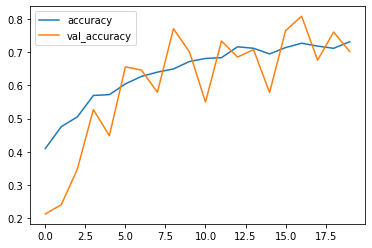

In [40]:
# Plot between Accuracy and val_accuracy

history_imp_df[['accuracy', 'val_accuracy']].plot()

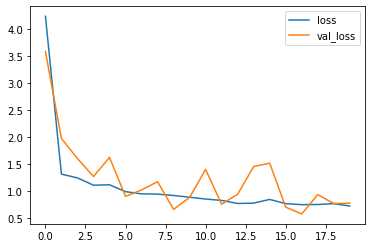

In [41]:
# Plot between loss and val_loss

history_imp_df[['loss', 'val_loss']].plot()

94/94 [==============================] - 3s 33ms/step - loss: 0.7900 - accuracy: 0.7023
Confusion Matrix
[[365   1   3  32   2  34]
 [  9 419   1  33   5   7]
 [  6   0 265 272   8   2]
 [  2   0  20 491  11   1]
 [ 44   2  75 209 178   2]
 [ 84   7   6  11   4 389]]
Classification Report
              precision    recall  f1-score   support

   buildings       0.72      0.84      0.77       437
      forest       0.98      0.88      0.93       474
     glacier       0.72      0.48      0.57       553
    mountain       0.47      0.94      0.62       525
         sea       0.86      0.35      0.50       510
      street       0.89      0.78      0.83       501

    accuracy                           0.70      3000
   macro avg       0.77      0.71      0.70      3000
weighted avg       0.77      0.70      0.70      3000



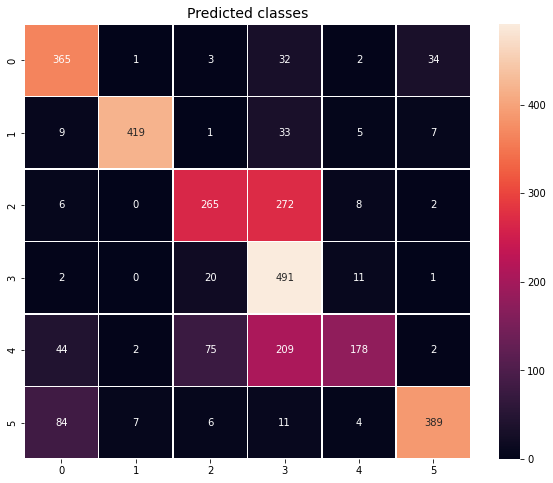

In [42]:
#Confution Matrix and Classification Report
Y_pred_imp = model_imp.predict(df_test)
model_imp.evaluate(df_test)
y_pred_imp = np.argmax(Y_pred_imp, axis=1)
print('Confusion Matrix')
print(confusion_matrix(df_test.classes, y_pred_imp))
print('Classification Report')
target_names = ['buildings','forest','glacier','mountain','sea','street']
print(classification_report(df_test.classes, y_pred_imp, target_names=target_names))
plt.figure(figsize=(10,8))
plt.title('Predicted classes', size=14)
sns.heatmap(confusion_matrix(df_test.classes, y_pred_imp), annot=True, fmt = '.0f',linewidths=.5)
plt.show()

In [43]:
## Save the model
model_imp.save('CNN_with_Regulization.h5')
model_imp = tf.keras.models.load_model('CNN_with_Regulization.h5')

setelah dilakukan improvement dengan batch normalization, hasil akurasi model hanya 73%. lebih rendah daripada model sebelumnya. dan model ini memerlukan waktu yang lebihh lama serta kekuatan komputasi yang lebih besar.

berdasarkan hasil kesimpulan kedua model maka saya akan menggunakan model pertama sebagai model final.

# 7 - Model Inference

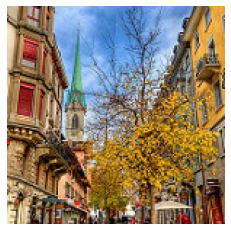

1/1 [==============================] - 0s 118ms/step
Result     :  [[0. 0. 0. 0. 0. 1.]]
Max Class  :  5
Class Name :  street



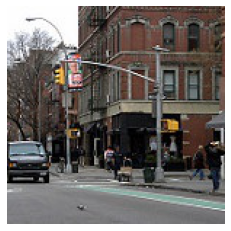

1/1 [==============================] - 0s 16ms/step
Result     :  [[0. 0. 0. 0. 0. 1.]]
Max Class  :  5
Class Name :  street



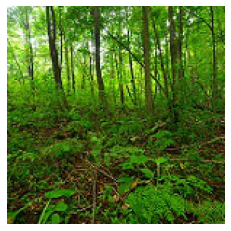

1/1 [==============================] - 0s 17ms/step
Result     :  [[0. 1. 0. 0. 0. 0.]]
Max Class  :  1
Class Name :  forest



In [44]:
from tensorflow.keras.preprocessing import image

img_paths = ['/content/seg_pred/seg_pred/10004.jpg',
             '/content/seg_pred/seg_pred/10040.jpg',
             '/content/seg_pred/seg_pred/10060.jpg']

for filename in img_paths:
  img = image.load_img(filename, target_size=(img_height, img_width))
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_batch = np.expand_dims(img_array, axis=0)

  prediction = model.predict(img_batch)
  result_max_proba = prediction.argmax(axis=-1)[0]
  label_dict = {0:'buildings',1:'forest',2:'glacier',3:'mountain',4:'sea',5:'street'}
  result_class = label_dict[result_max_proba]

  print('Result     : ', prediction)
  print('Max Class  : ', result_max_proba)
  print('Class Name : ', result_class)
  print('')

# 8 - Kesimpulan

Berdasarkan EDA :
- Dataset ini terdiri dari gambar bangunan, hutan, glacier, pegunungan, lautan, dan jalan
- jumlah gambar di masing masing data set cukup seimbang.

Berdasarkan Model: 
- Model Sequential pertama yang saya gunkan. Model ini cukup bagus. memiliki akurasi 83%
precission disini adalah berhasilnya menebak dari data support sebanyak hasil, jika dilihat dari `class 0` angka 0.91 artinya sebanyak 91% berhasil menebak dan 9% menebak salah,
dan recall disini sebesar 64% yang artinnya berhasil menebak 64% dan sisa 36% itu adalah data selain class tersebut, begitu pula di kelas 1-6.

- lalu saya melakukan improvement pada modelnya. saya  menambahkan layesrs batch normalization dengan harapan setelah di normalisasi dapat meningkatkan akurasi

untuk optimizer, loss, dan metrics masih menggunakan fitur yang sama.

- setelah dilakukan improvement dengan batch normalization, hasil akurasi model hanya 73%. lebih rendah daripada model sebelumnya. dan model ini memerlukan waktu yang lebihh lama serta kekuatan komputasi yang lebih besar.

- berdasarkan hasil kesimpulan kedua model maka saya akan menggunakan model pertama sebagai model final.

# Final Model Saving

In [45]:
## Save the model
model.save('final_model')

In [46]:
! zip -r final_model.zip final_model

  adding: final_model/ (stored 0%)
  adding: final_model/keras_metadata.pb (deflated 92%)
  adding: final_model/variables/ (stored 0%)
  adding: final_model/variables/variables.data-00000-of-00001 (deflated 30%)
  adding: final_model/variables/variables.index (deflated 67%)
  adding: final_model/saved_model.pb (deflated 89%)
  adding: final_model/assets/ (stored 0%)
